In [1]:
%matplotlib inline

import utils_ted
from utils_ted import *

Using TensorFlow backend.


In [20]:
path = 'data/glove.6B/'
res_path = path + 'results/'
if not os.path.exists(res_path): os.makedirs(res_path)

## Preprocessing

This section shows how we processed the original glove text files. However, there's no need for you to do this, since we provide the [pre-processed glove data](files.fast.ai/models/glove).

In [21]:
def get_glove(name):
    with open(path + "glove.6B." + name + '.txt', 'r', encoding='utf8') as f:
        lines = [line for line in f]
    words = [line.split()[0] for line in lines]
    vecs = np.stack(np.array(line.split()[1:], dtype=np.float32) for line in lines)
    wordidx = { w:i for i,w in enumerate(words) }
    save_array(res_path+name+'.dat', vecs)
    pickle.dump(words, open(res_path+name+'_words.pkl', 'wb'))
    pickle.dump(wordidx, open(res_path+name+'_wordidx.pkl', 'wb'))

In [22]:
get_glove('50d')
get_glove('100d')
get_glove('200d')
get_glove('300d')

## Looking at the vectors

After you've downloaded the [pre-processed glove data](files.fast.ai/models/glove), you should use `tar -zxf` to untar them, and put them in the path that {res_path} points to. (If you don't have a great internet connection, feel free to only download the 50d version, since that's what we'll be using in class). 

Then the following function will return the word vectors as a matrix, the word list, and the mapping from word to index.

In [23]:
def load_glove(loc):
    return (load_array(loc+'.dat'), 
            pickle.load(open(loc+'_words.pkl', 'rb')),
            pickle.load(open(loc+'_wordidx.pkl', 'rb')))

In [24]:
name = '50d'

In [25]:
vecs, words, wordidx = load_glove(res_path+name)

In [26]:
vecs.shape

(400000, 50)

Here's the first 25 "words" in glove.

In [27]:
" ".join(words[:25])

'the , . of to and in a " \'s for - that on is was said with he as it by at ( )'

This is how you can look up a word vector.

In [30]:
def w2v(w): return vecs[wordidx[w]]

In [39]:
w2v('the')

array([  4.18000013e-01,   2.49679998e-01,  -4.12420005e-01,
         1.21699996e-01,   3.45270008e-01,  -4.44569997e-02,
        -4.96879995e-01,  -1.78619996e-01,  -6.60229998e-04,
        -6.56599998e-01,   2.78430015e-01,  -1.47670001e-01,
        -5.56770027e-01,   1.46579996e-01,  -9.50950012e-03,
         1.16579998e-02,   1.02040000e-01,  -1.27920002e-01,
        -8.44299972e-01,  -1.21809997e-01,  -1.68009996e-02,
        -3.32789987e-01,  -1.55200005e-01,  -2.31309995e-01,
        -1.91809997e-01,  -1.88230002e+00,  -7.67459989e-01,
         9.90509987e-02,  -4.21249986e-01,  -1.95260003e-01,
         4.00710011e+00,  -1.85939997e-01,  -5.22870004e-01,
        -3.16810012e-01,   5.92130003e-04,   7.44489999e-03,
         1.77780002e-01,  -1.58969998e-01,   1.20409997e-02,
        -5.42230010e-02,  -2.98709989e-01,  -1.57490000e-01,
        -3.47579986e-01,  -4.56370004e-02,  -4.42510009e-01,
         1.87849998e-01,   2.78489990e-03,  -1.84110001e-01,
        -1.15139998e-01,

Just for fun, let's take a look at a 2d projection of the first 350 words, using [T-SNE](http://distill.pub/2016/misread-tsne/).

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vecs[:500])

Y.shape

(500, 2)

<function matplotlib.pyplot.show>

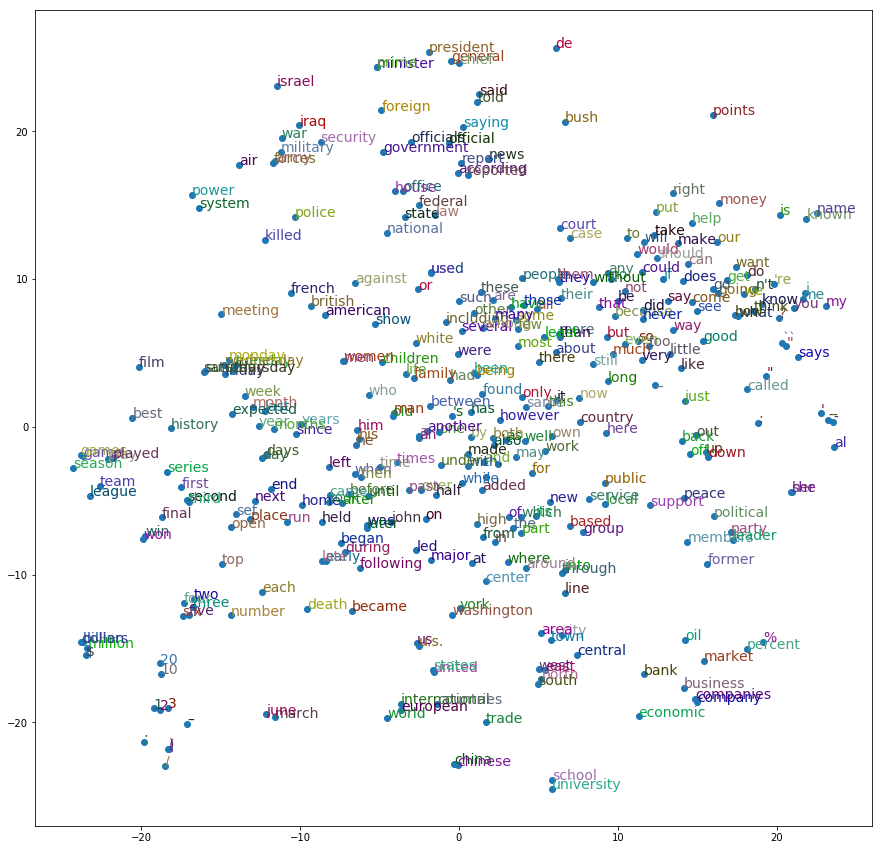

In [38]:
start=0; end=350
dat = Y[start:end]
plt.figure(figsize=(15,15))
plt.scatter(dat[:, 0], dat[:, 1])
for label, x, y in zip(words[start:end], dat[:, 0], dat[:, 1]):
    plt.text(x, y, label, color=np.random.rand(3)*0.7, fontsize=14)
plt.show